## Bell States


Bell state is constructed with application of $\textbf{Hadamard}$ and $\textbf{CNOT}$ gates in two qubit system.


In [2]:
from qiskit import *
from math import pi
import numpy as np
from qiskit.visualization import *
import matplotlib.pyplot as plt
from qutip import *

### 1. Bell State Circuit ($\beta_{00}$)

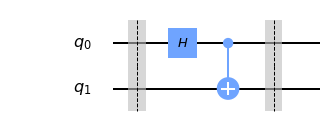

In [14]:
qc = QuantumCircuit(2)
qc.barrier()
qc.h(0)
qc.cx(0, 1)
qc.barrier()
qc.draw('mpl')

#### 1.2. Two qubit system (state vector)
 <ul>
        <li> Initial state = |00> </li>
        <li> After application of Hadamard Gate: $\frac{1}{\sqrt{2}}|00\rangle + \frac{1}{\sqrt{2}}|01\rangle $ </li>
        <li> After application of CNOT Gate: $\frac{1}{\sqrt{2}}|00 \rangle + \frac{1}{\sqrt{2}}|11 \rangle $ </li>
</ul>



In [7]:
backend = Aer.get_backend('statevector_simulator')
out = execute(qc,backend).result().get_statevector()
print(out)

[0.70710678+0.j 0.        +0.j 0.        +0.j 0.70710678+0.j]


#### 1.3 Single qubit states (tensor product)

<div class="alert alert-block alert-danger">
$\textbf{Question:}$ Can you write Bell state as a tensor product of single qubit state?
</div>

$\textbf{Answer}$: No, it is not possible. It is hard to realise.
    
  $\begin{bmatrix}
    p   \\
    q 
\end{bmatrix} \otimes \begin{bmatrix}
    r   \\
    s 
\end{bmatrix} = c \begin{bmatrix}
    m   \\
    0 \\
    0 \\
    n
\end{bmatrix}$


#### 4. Matrix element (tensor product)

<div class="alert alert-block alert-danger">
$\textbf{Question:}$ Can we write matrix represented by the Bell circuit as a  tensor product of fundamental gate matrices?
</div>

Based on above Bell circuit, lets construct the matrix representation of the circuit using fundamental gates matrices involved in the circuit.

$H = \frac{1}{\sqrt{2}} \begin{bmatrix}
    1  & 1 \\
    1 & -1
\end{bmatrix}; I = \frac{1}{\sqrt{2}} \begin{bmatrix}
    1  & 0 \\
    0 &  1
\end{bmatrix}; \text{CNOT} = \begin{bmatrix} 1 & 0 & 0 & 0 \\
                              0 & 0 & 0 & 1 \\
                              0 & 0 & 1 & 0 \\
                              0 & 1 & 0 & 0 \\
\end{bmatrix}$

- Before first barrier

$I \otimes H$ = $ \begin{bmatrix}
    H  & 0 \\
    0 & H
\end{bmatrix}$

- After first barrier

$\text{CNOT}$ 

- Net operation before measurement

$U = \text{CNOT} \times (I \otimes H)   $
    

Lets express ``U`` matrix using ``numpy`` library.

In [11]:
I = np.eye(2,2)
H = 1/np.sqrt(2)*np.array([[1,1],[1,-1]])
CNOT = np.array([[1,0,0,0],[0,0,0,1],[0,0,1,0],[0,1,0,0]])
IKH = np.kron(I,H)
U = np.dot(CNOT,IKH)
print(U)

[[ 0.70710678  0.70710678  0.          0.        ]
 [ 0.          0.          0.70710678 -0.70710678]
 [ 0.          0.          0.70710678  0.70710678]
 [ 0.70710678 -0.70710678  0.          0.        ]]


In [6]:
backend = Aer.get_backend('unitary_simulator')
job = execute(qc, backend)
result = job.result()
print(result.get_unitary(qc, decimals=3))

[[ 0.707+0.j  0.707-0.j  0.   +0.j  0.   +0.j]
 [ 0.   +0.j  0.   +0.j  0.707+0.j -0.707+0.j]
 [ 0.   +0.j  0.   +0.j  0.707+0.j  0.707-0.j]
 [ 0.707+0.j -0.707+0.j  0.   +0.j  0.   +0.j]]


We can also observe final ket vector by multiplying it with ```U``` matrix.

In [12]:
ket_00 = np.array([1,0,0,0])
np.dot(U,ket_00)

array([0.70710678, 0.        , 0.        , 0.70710678])

### 2. Bell State Circuit ($\beta_{01}$)

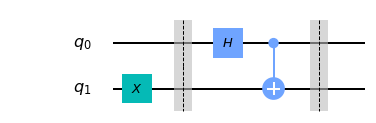

In [34]:
qc = QuantumCircuit(2)
qc.x(1)
qc.barrier()
qc.h(0)
qc.cx(0, 1)
qc.barrier()
qc.draw('mpl')

In [35]:
# Let's see the result
backend = Aer.get_backend('statevector_simulator')
out = execute(qc,backend).result().get_statevector()
print(out)

[0.        +0.j 0.70710678+0.j 0.70710678+0.j 0.        +0.j]


### 3. Bell State Circuit ($\beta_{10}$)

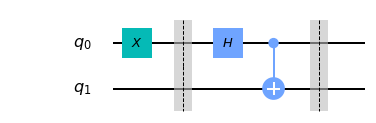

In [36]:
qc = QuantumCircuit(2)
qc.x(0)
qc.barrier()
qc.h(0)
qc.cx(0, 1)
qc.barrier()
qc.draw('mpl')

In [37]:
# Let's see the result
backend = Aer.get_backend('statevector_simulator')
out = execute(qc,backend).result().get_statevector()
print(out)

[ 0.70710678-8.65956056e-17j  0.        +0.00000000e+00j
  0.        +0.00000000e+00j -0.70710678+8.65956056e-17j]


### 4. Bell State Circuit ($\beta_{11}$)

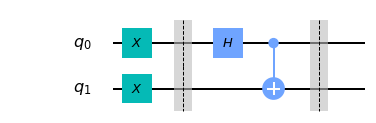

In [38]:
qc = QuantumCircuit(2)
qc.x(0)
qc.x(1)
qc.barrier()
qc.h(0)
qc.cx(0, 1)
qc.barrier()
qc.draw('mpl')

In [39]:
# Let's see the result
backend = Aer.get_backend('statevector_simulator')
out = execute(qc,backend).result().get_statevector()
print(out)

[ 0.        +0.00000000e+00j -0.70710678+8.65956056e-17j
  0.70710678-8.65956056e-17j  0.        +0.00000000e+00j]


### Measurement